## Blast unassigned ortholgs against the NCBI nr

In [40]:
#imports
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [41]:
# read in table to find unmapped genes
augustus_tsv = '../overlap_tables/fdog_ass_busco_augustus_overlap_gff_files_gallus_v2.tsv'
metaeuk_sens = '../overlap_tables/fdog_ass_busco_metaeuk_overlap_gff_files_gallus_v2_sens.tsv'
fda_augustus_df = pd.read_csv(augustus_tsv, delimiter='\t')
fda_metaeuk_df = pd.read_csv(metaeuk_sens, delimiter='\t')
display(fda_augustus_df)
display(fda_metaeuk_df)

,Species,GeneID,transcript,overlap,uniprotID,coverage
0,9031,139188at33208,139188at33208_CM000103_5_1_g2.t1,2290.0,F1NHU0,0.996953
1,9031,139188at33208,139188at33208_CM000103_5_1_g2.t1,2214.0,F1NHU0,1.000000
2,9031,139188at33208,139188at33208_CM000103_5_1_g2.t1,2181.0,F1NHU0,0.975839
3,9031,567750at33208,567750at33208_CM000103_5_1_g2.t1,415.0,NaN,1.000000
4,9031,57158at33208,57158at33208_CM000103_5_1_g4.t1,3486.0,A0A1D6UPS9,1.000000
...,...,...,...,...,...,...
14294,8364,273040at33208,273040at33208_NC_030683_2_1_g2.t1,1099.0,A0A8J0SRX4,0.872915
14295,8364,273040at33208,273040at33208_NC_030683_2_1_g2.t1,1227.0,A0A8J1JU74,0.884643
14296,8364,498535at33208,498535at33208_NW_022279441_1_1_g1.t1,229.0,Q6P811,0.677515
14297,8364,560584at33208,560584at33208_NW_022279393_1_1_g1.t1,552.0,A0A8J0QFS4,1.000000


,Species,GeneID,transcript,overlap,uniprotID,coverage
0,6239,349627at33208,349627at33208_BX284601.5_1_2_mRNA,494.0,O44992,1.000000
1,6239,13816at33208,13816at33208_BX284601.5_1_2_mRNA,5952.0,G5EDT9,0.743164
2,6239,556039at33208,556039at33208_BX284601.5_1_1_mRNA,358.0,Q93831,0.957219
3,6239,421396at33208,421396at33208_BX284601.5_1_1_mRNA,400.0,G5EF86,0.909091
4,6239,642323at33208,642323at33208_BX284601.5_1_2_mRNA,398.0,O17839,1.000000
...,...,...,...,...,...,...
14471,6945,439736at33208,439736at33208_DS779705.1_1_2_mRNA,359.0,B7PSP2,0.997222
14472,6945,118209at33208,118209at33208_DS619513.1_1_1_mRNA,NaN,NaN,NaN
14473,6945,361216at33208,361216at33208_DS789461.1_1_3_mRNA,148.0,B7PTZ9,0.961039
14474,6945,529092at33208,529092at33208_DS647067.1_1_1_mRNA,NaN,NaN,NaN


In [64]:
def unassigned_genes(df, species):
    mask = df['overlap'].isnull()
    unassigned = df[mask]
    print(unassigned)
    pairs_rows = unassigned[['Species','GeneID', 'transcript']].copy()
    print(pairs_rows['Species'].value_counts())   
    #unassigned_pairs = pairs_rows.values.tolist()
    return pairs_rows[pairs_rows['Species'] == species].values.tolist()

## Augustus

In [65]:
unassigned = unassigned_genes(fda_augustus_df, 45351)
print(unassigned)

       Species         GeneID                         transcript  overlap  \
292       9031  453052at33208   453052at33208_CM000102_5_1_g3.t1      NaN   
569       9031  587958at33208   587958at33208_CM000095_5_1_g1.t1      NaN   
1109      9031  540193at33208   540193at33208_CM000097_5_1_g2.t1      NaN   
1159      9031  592094at33208   592094at33208_CM000097_5_1_g1.t1      NaN   
1427      9031  580062at33208   580062at33208_CM000114_5_1_g3.t1      NaN   
...        ...            ...                                ...      ...   
13323     8364  500808at33208  500808at33208_NC_030677_2_4_g3.t1      NaN   
13469     8364  429751at33208  429751at33208_NC_030681_2_1_g1.t1      NaN   
13765     8364  130256at33208  130256at33208_NC_030678_2_1_g3.t1      NaN   
13767     8364  429751at33208  429751at33208_NC_030678_2_1_g2.t1      NaN   
14133     8364  429751at33208  429751at33208_NC_030685_2_1_g3.t1      NaN   

      uniprotID  coverage  
292         NaN       NaN  
569         NaN    

In [66]:
bit_score_dict = {}
bit_score_dict['gene'] = []
bit_score_dict['transcript'] = []
bit_score_dict['length'] = []
bit_score_dict['max-bitscore'] = []
bit_score_dict['bitscore_best_hit'] = []
bit_score_dict['best_hit'] = []

In [45]:
#extract sequences from fDA output
out = '../blast_unassigned_orthologs/unassigned_genes_nematostella.fa'
out_file = open(out, 'w')
fasta_file = '../augustus_busco_core/fdog_assembly_core_busco_metazoa_jul24_augustus_og.fa'
for i in unassigned:
    species, busco, transcript = i
    transcript_id = transcript.replace(busco + '_', '').replace('_', '.', 1)
    #print(species, busco, transcript_id)
    !grep $species $fasta_file -A1 | grep $busco -A1| grep $transcript_id -A1 >> $out
#make blastdb 
# makeblastdb -in unassigned_genes_nematostella.fa -dbtype prot -title db_unassigned_genes/unassigned_genes -out db_unassigned_genes/unassigned_genes

In [ ]:
#blast
#blastp -query unassigned_genes_nematostella.fa -db db_unassigned_genes/unassigned_genes -out self_search.out -outfmt "6 qseqid sseqid evalue bitscore length slen qlen" -max_target_seqs 1

In [67]:
#parse results self-search
blast_self_out = open("../blast_unassigned_orthologs/self_search.out", "r")
lines = blast_self_out.readlines()
for line in lines:
    line = line.rstrip()
    qseqid, sseqid, evalue, bitscore,length, slen, qlen = line.split("\t")
    busco_id = qseqid.split("|")[0]
    if qseqid != sseqid:
        print(sseqid)
    bit_score_dict['gene'].append(busco_id)
    bit_score_dict['transcript'].append(qseqid)
    bit_score_dict['max-bitscore'].append(bitscore)
    bit_score_dict['length'].append(length)
    bit_score_dict['bitscore_best_hit'].append(0)
    bit_score_dict['best_hit'].append(None)

df = pd.DataFrame(bit_score_dict)
display(df)

,gene,transcript,length,max-bitscore,bitscore_best_hit,best_hit
0,465703at33208,465703at33208|NEMVE@45351@QfO22|DS469605.1_1_g...,299,616,0,None
1,567750at33208,567750at33208|NEMVE@45351@QfO22|DS469698.1_1_g...,149,310,0,None
2,88053at33208,88053at33208|NEMVE@45351@QfO22|DS469646.1_1_g2...,368,746,0,None
3,495605at33208,495605at33208|NEMVE@45351@QfO22|DS471661.1_1_g...,87,174,0,None
4,184717at33208,184717at33208|NEMVE@45351@QfO22|DS469508.1_1_g...,608,1255,0,None
5,622270at33208,622270at33208|NEMVE@45351@QfO22|DS469672.1_1_g...,341,707,0,None
6,424646at33208,424646at33208|NEMVE@45351@QfO22|DS469774.1_1_g...,406,840,0,None
7,557596at33208,557596at33208|NEMVE@45351@QfO22|DS469507.1_1_g...,227,465,0,None
8,504731at33208,504731at33208|NEMVE@45351@QfO22|DS469604.1_1_g...,264,547,0,None
9,559576at33208,559576at33208|NEMVE@45351@QfO22|DS470122.1_1_g...,379,781,0,None


In [68]:
#parse results nr search limited to cnidaria
blast_out = open("../blast_unassigned_orthologs/unassigned_search.out", 'r')
lines = blast_out.readlines()
query = None
max_bit = 0
s = None
for line in lines:
    line = line.rstrip()
    #print(line)
    qseqid, sseqid, evalue, bitscore,length, slen, qlen, species, titel = line.split("\t")
    if qseqid != query and query != None:
        df.loc[(df['transcript'] == query), 'bitscore_best_hit'] = max_bit
        df.loc[(df['transcript'] == query), 'best_hit'] = s
        s = sseqid
        query = qseqid
        max_bit= float(bitscore)
    elif query == None:
        s = sseqid
        query = qseqid
        max_bit= float(bitscore)
    else:
        if max_bit < float(bitscore):
            query = qseqid
            s = sseqid
            max_bit = float(bitscore)
df.loc[(df['transcript'] == qseqid), 'bitscore_best_hit'] = max_bit
df.loc[(df['transcript'] == qseqid), 'best_hit'] = s

df['max-bitscore'] = df['max-bitscore'].astype(float)
df['normalized_bit_score'] = df['bitscore_best_hit'] / df['max-bitscore']
display(df)

/tmp/ipykernel_1771467/1247738688.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '89.4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['transcript'] == qseqid), 'bitscore_best_hit'] = max_bit


,gene,transcript,length,max-bitscore,bitscore_best_hit,best_hit,normalized_bit_score
0,465703at33208,465703at33208|NEMVE@45351@QfO22|DS469605.1_1_g...,299,616.0,616.0,ref|XP_032236339.1|,1.000000
1,567750at33208,567750at33208|NEMVE@45351@QfO22|DS469698.1_1_g...,149,310.0,276.0,ref|XP_032231230.1|,0.890323
2,88053at33208,88053at33208|NEMVE@45351@QfO22|DS469646.1_1_g2...,368,746.0,717.0,ref|XP_032233678.2|,0.961126
3,495605at33208,495605at33208|NEMVE@45351@QfO22|DS471661.1_1_g...,87,174.0,131.0,ref|XP_001635999.3|,0.752874
4,184717at33208,184717at33208|NEMVE@45351@QfO22|DS469508.1_1_g...,608,1255.0,1253.0,ref|XP_032223111.2|,0.998406
5,622270at33208,622270at33208|NEMVE@45351@QfO22|DS469672.1_1_g...,341,707.0,525.0,ref|XP_048588596.1|,0.742574
6,424646at33208,424646at33208|NEMVE@45351@QfO22|DS469774.1_1_g...,406,840.0,545.0,ref|XP_032228851.2|,0.648810
7,557596at33208,557596at33208|NEMVE@45351@QfO22|DS469507.1_1_g...,227,465.0,372.0,ref|XP_032223353.2|,0.800000
8,504731at33208,504731at33208|NEMVE@45351@QfO22|DS469604.1_1_g...,264,547.0,547.0,ref|XP_032236381.1|,1.000000
9,559576at33208,559576at33208|NEMVE@45351@QfO22|DS470122.1_1_g...,379,781.0,494.0,ref|XP_032225153.2|,0.632522


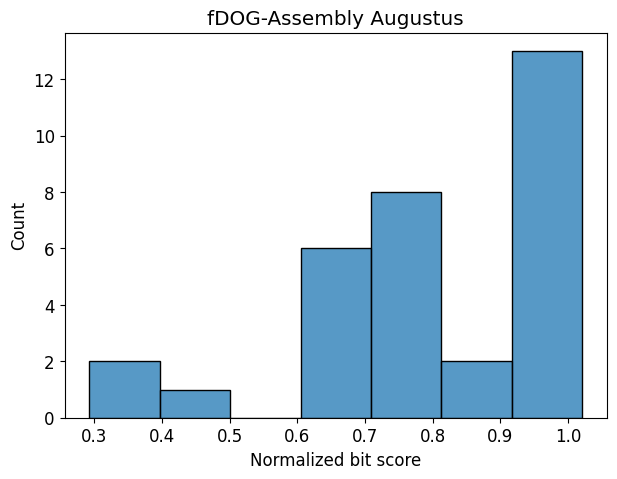

In [69]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(7, 5))
sb.histplot(df, x="normalized_bit_score", binwidth=0.1)
plt.xlabel('Normalized bit score')
ax.set_title('fDOG-Assembly Augustus')
plt.savefig('bitscore_nemve_fda_augustus_unassigned_genes.png', dpi=900, bbox_inches='tight')

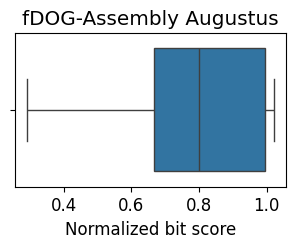

In [70]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(3.5, 2))
sb.boxplot(df, x="normalized_bit_score")
plt.xlabel('Normalized bit score')
ax.set_title('fDOG-Assembly Augustus')
plt.savefig('bitscore_nemve_fda_augustus_unassigned_genes_boxplot.png', dpi=900, bbox_inches='tight')

## MetaEuk

In [52]:
unassigned = unassigned_genes(fda_metaeuk_df, 45351)
print(unassigned)

       Species         GeneID                         transcript  overlap  \
105       6239  473106at33208  473106at33208_BX284601.5_1_1_mRNA      NaN   
199       6239  239149at33208  239149at33208_BX284601.5_1_8_mRNA      NaN   
295       6239  447400at33208  447400at33208_BX284605.5_1_2_mRNA      NaN   
341       6239  611891at33208  611891at33208_BX284605.5_1_3_mRNA      NaN   
475       6239  582473at33208  582473at33208_BX284603.4_1_4_mRNA      NaN   
...        ...            ...                                ...      ...   
14467     6945  511668at33208  511668at33208_DS876948.1_1_1_mRNA      NaN   
14468     6945  226335at33208  226335at33208_DS883532.1_1_1_mRNA      NaN   
14470     6945  352854at33208  352854at33208_DS817921.1_1_1_mRNA      NaN   
14472     6945  118209at33208  118209at33208_DS619513.1_1_1_mRNA      NaN   
14474     6945  529092at33208  529092at33208_DS647067.1_1_1_mRNA      NaN   

      uniprotID  coverage  
105         NaN       NaN  
199         NaN    

In [53]:
bit_score_dict = {}
bit_score_dict['gene'] = []
bit_score_dict['transcript'] = []
bit_score_dict['length'] = []
bit_score_dict['max-bitscore'] = []
bit_score_dict['bitscore_best_hit'] = []
bit_score_dict['best_hit'] = []

In [55]:
#extract sequences from fDA output
out = '../blast_unassigned_orthologs/unassigned_genes_nematostella_metaeuk.fa'
out_file = open(out, 'w')
fasta_file = '../metaeuk_busco_core_sens/fdog_assembly_core_busco_metazoa_sens_jan25_metaeuk_og.fa'
for i in unassigned:
    species, busco, transcript = i
    transcript_id = transcript.replace(busco + '_', '').replace('_', '.', 1).replace('_mRNA', '')
    #print(species, busco, transcript_id)
    !grep $species $fasta_file -A1 | grep $busco -A1| grep $transcript_id -A1 >> $out
#make blastdb 
# makeblastdb -in unassigned_genes_nematostella_metaeuk.fa -dbtype prot -title unassigned_genes_metaeuk -out db_unassigned_genes/unassigned_genes_metaeuk

In [ ]:
#blast
#blast
#blastp -query unassigned_genes_nematostella_metaeuk.fa -db db_unassigned_genes/unassigned_genes_metaeuk -out self_search_metaeuk.out -outfmt "6 qseqid sseqid evalue bitscore length slen qlen" -max_target_seqs 1

In [56]:
#parse results self-search
blast_self_out = open("../blast_unassigned_orthologs/self_search_metaeuk.out", "r")
lines = blast_self_out.readlines()
for line in lines:
    line = line.rstrip()
    qseqid, sseqid, evalue, bitscore,length, slen, qlen = line.split("\t")
    busco_id = qseqid.split("|")[0]
    if qseqid != sseqid:
        print(sseqid)
    bit_score_dict['gene'].append(busco_id)
    bit_score_dict['transcript'].append(qseqid)
    bit_score_dict['max-bitscore'].append(bitscore)
    bit_score_dict['length'].append(length)
    bit_score_dict['bitscore_best_hit'].append(0)
    bit_score_dict['best_hit'].append(None)

df = pd.DataFrame(bit_score_dict)
display(df)

,gene,transcript,length,max-bitscore,bitscore_best_hit,best_hit
0,152977at33208,152977at33208|NEMVE@45351@QfO22|DS469526.1_1_1|1,124,251,0,None
1,184717at33208,184717at33208|NEMVE@45351@QfO22|DS469508.1_1_1|1,591,1219,0,None
2,600823at33208,600823at33208|NEMVE@45351@QfO22|DS469533.1_1_1|1,266,549,0,None
3,631107at33208,631107at33208|NEMVE@45351@QfO22|DS469722.1_1_1|1,246,503,0,None
4,524165at33208,524165at33208|NEMVE@45351@QfO22|DS470958.1_1_1|0,358,746,0,None
...,...,...,...,...,...,...
76,378768at33208,378768at33208|NEMVE@45351@QfO22|DS478042.1_1_1|0,71,148,0,None
77,443928at33208,443928at33208|NEMVE@45351@QfO22|DS471281.1_1_2|1,107,218,0,None
78,502429at33208,502429at33208|NEMVE@45351@QfO22|DS478882.1_1_1|1,81,169,0,None
79,356334at33208,356334at33208|NEMVE@45351@QfO22|DS475240.1_1_1|1,38,81.6,0,None


In [57]:
#parse results nr search limited to cnidaria
blast_out = open("../blast_unassigned_orthologs/unassigned_search_metaeuk.out", 'r')
lines = blast_out.readlines()
query = None
max_bit = 0
s = None
for line in lines:
    line = line.rstrip()
    #print(line)
    qseqid, sseqid, evalue, bitscore,length, slen, qlen, species, titel = line.split("\t")
    if qseqid != query and query != None:
        df.loc[(df['transcript'] == query), 'bitscore_best_hit'] = max_bit
        df.loc[(df['transcript'] == query), 'best_hit'] = s
        s = sseqid
        query = qseqid
        max_bit= float(bitscore)
    elif query == None:
        s = sseqid
        query = qseqid
        max_bit= float(bitscore)
    else:
        if max_bit < float(bitscore):
            query = qseqid
            s = sseqid
            max_bit = float(bitscore)
df.loc[(df['transcript'] == qseqid), 'bitscore_best_hit'] = max_bit
df.loc[(df['transcript'] == qseqid), 'best_hit'] = s

df['max-bitscore'] = df['max-bitscore'].astype(float)
df['normalized_bit_score'] = df['bitscore_best_hit'] / df['max-bitscore']
display(df)

/tmp/ipykernel_1771467/3260466838.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '70.9' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['transcript'] == query), 'bitscore_best_hit'] = max_bit


,gene,transcript,length,max-bitscore,bitscore_best_hit,best_hit,normalized_bit_score
0,152977at33208,152977at33208|NEMVE@45351@QfO22|DS469526.1_1_1|1,124,251.0,202.0,gb|EDO46526.1|,0.804781
1,184717at33208,184717at33208|NEMVE@45351@QfO22|DS469508.1_1_1|1,591,1219.0,1169.0,ref|XP_032223111.2|,0.958983
2,600823at33208,600823at33208|NEMVE@45351@QfO22|DS469533.1_1_1|1,266,549.0,525.0,ref|XP_032218220.2|,0.956284
3,631107at33208,631107at33208|NEMVE@45351@QfO22|DS469722.1_1_1|1,246,503.0,506.0,ref|XP_032230313.2|,1.005964
4,524165at33208,524165at33208|NEMVE@45351@QfO22|DS470958.1_1_1|0,358,746.0,716.0,gb|EDO37137.1|,0.959786
...,...,...,...,...,...,...,...
76,378768at33208,378768at33208|NEMVE@45351@QfO22|DS478042.1_1_1|0,71,148.0,146.0,ref|XP_001629998.1|,0.986486
77,443928at33208,443928at33208|NEMVE@45351@QfO22|DS471281.1_1_2|1,107,218.0,220.0,gb|EDO46580.1|,1.009174
78,502429at33208,502429at33208|NEMVE@45351@QfO22|DS478882.1_1_1|1,81,169.0,170.0,gb|EDO33465.1|,1.005917
79,356334at33208,356334at33208|NEMVE@45351@QfO22|DS475240.1_1_1|1,38,81.6,86.3,gb|EDO47847.1|,1.057598


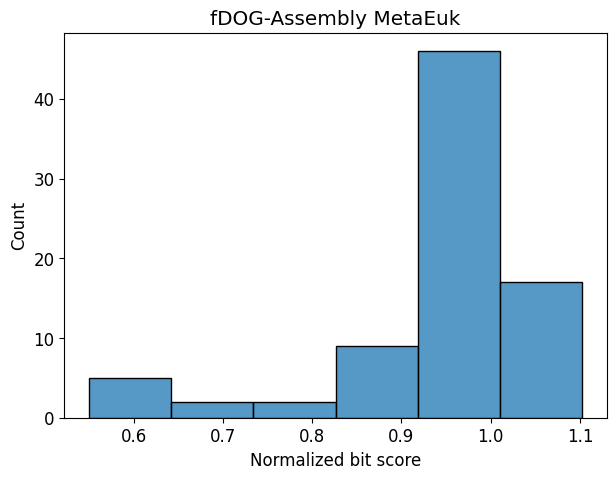

In [58]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(7, 5))
sb.histplot(df, x="normalized_bit_score", binwidth=0.1)
plt.xlabel('Normalized bit score')
ax.set_title('fDOG-Assembly MetaEuk')
plt.savefig('bitscore_nemve_fda_metaeuk_unassigned_genes.png', dpi=900, bbox_inches='tight')

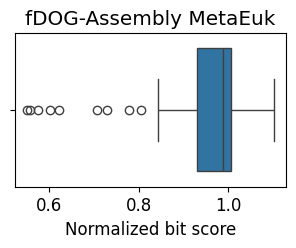

In [62]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(3.5, 2))
sb.boxplot(df, x="normalized_bit_score")
plt.xlabel('Normalized bit score')
ax.set_title('fDOG-Assembly MetaEuk')
plt.savefig('bitscore_nemve_fda_metaeuk_unassigned_genes_boxplot.png', dpi=900, bbox_inches='tight')